# Tools
Vcsn comes with a set of programs that you use to manipulate automata, expressions, etc.

It is much less powerful than writing Python programs, however it comes handy occasionally to process a batch of files, or for a quick experiment.

## Synopsis

    vcsn COMMAND [OPTION...] ARG...
    
Run `vcsn tools --help` for details on the interface:

In [1]:
!vcsn tools --help

usage: vcsn COMMAND [OPTIONS...] [ARGS...]

General Options:
  -h, --help      display this help message and exit successfully
  -c, --commands  display the supported commands and exit successfully

Available COMMANDs:
  accessible add ambiguous-word are-equivalent are-isomorphic cat
  cerny coaccessible codeterminize cominimize complement complete
  component compose concatenate condense conjugate conjunction
  constant-term context-of copy costandard cotrie de-bruijn
  delay-automaton derivation derived-term determinize difference
  divkbaseb eliminate-state evaluate expand expression-one
  expression-zero factor focus get-format has-bounded-lag
  has-lightening-cycle has-twins-property identities-of inductive
  infiltrate insplit is-accessible is-ambiguous is-coaccessible
  is-codeterministic is-complete is-costandard is-cycle-ambiguous
  is-deterministic is-empty is-eps-acyclic is-functional is-letterized
  is-normalized is-out-sorted is-partial-identity is-proper
  is-realtime is-

You can also run `vcsn tools COMMAND -h` to get information about a particular command.

In [2]:
!vcsn tools evaluate -h

usage: vcsn evaluate [OPTIONS...] [ARGS...]

Available versions:
  AUT:automaton L:word -> weight
    Evaluate L on AUT.

  AUT:automaton P:polynomial -> weight
    Evaluate P on AUT.

For more help about available options, please use "vcsn tools --help"


In [3]:
!vcsn tools multiply -h

usage: vcsn multiply [OPTIONS...] [ARGS...]

Available versions:
  AUT:automaton MIN:number [MAX=-2:number] [ALGO="auto":string] -> automaton
    Repeated multiplication (concatenation) of an automaton with itself.
    Parameters:
      AUT  the automaton.
      MIN  the minimum number.  If -1, denotes 0.
      MAX  the maximum number.
           If -1, denotes infinity, using star.
           If -2, denotes the same value as min.
      ALGO  how to compute the result
        - "standard"    AUT is standard,
                        build a standard automaton.
        - "general"     no requirement on AUT,
                        but add spontaneous transitions.
        - "auto"        "standard" if AUT is standard,
                        "general" otherwise.

  E:expression MIN:number [MAX=-2:number] -> expression
    Repeated multiplication (concatenation) of an expression with itself.
    Parameters:
      E    the expression.
      MIN  the minimum number.  If -1, denotes 0.
      

## Examples
To generate the standard automaton of `[ab]*c` and save it in `abc.gv`:

In [4]:
!vcsn standard -Ee '[ab]*c' -o abc.gv

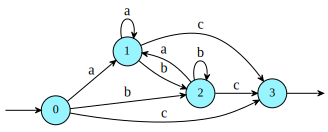

In [5]:
import vcsn
vcsn.automaton(filename='abc.gv')

To generate a Thompson automaton, make it proper, determinize it and extract a rational expression from it:

In [6]:
!vcsn thompson -Ee '[ab]*c' | vcsn proper | vcsn determinize | vcsn to-expression

c+aa*c+(b+aa*b)(b+aa*b)*(c+aa*c)


Likewise, but with an additional minimization step:

In [7]:
!vcsn thompson -Ee '[ab]*c' | vcsn proper | vcsn determinize | vcsn minimize | vcsn to-expression

(a+b)*c


The Python equivalent of these last runs are:

In [8]:
vcsn.B.expression('[ab]*c').thompson().proper().determinize().expression()

c+aa*c+(b+aa*b)(b+aa*b)*(c+aa*c)

In [9]:
vcsn.B.expression('[ab]*c').thompson().proper().determinize().minimize().expression()

(a+b)*c